# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 1: Using Git and Python for Collaborative Coding in Google Colab*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | Aziza | Ahsan | Aziza Ahsan, 11.11.2024 | 8 | 25 |
| Member 2: | Maggie | Somers | Maggie Somers, 11.11.2024 | 8 | 25 |
| Member 3: | Rasmita | Ghimire | Rasmita Ghimire, 11.11.2024 | 8 | 25 |
| Member 4: | Sanzida | Rahman | Sanzida Rahman, 11.11.2024 | 8 | 25 |


# **Linear LSE**
### (40 Marks)

### **Curve Fitting**

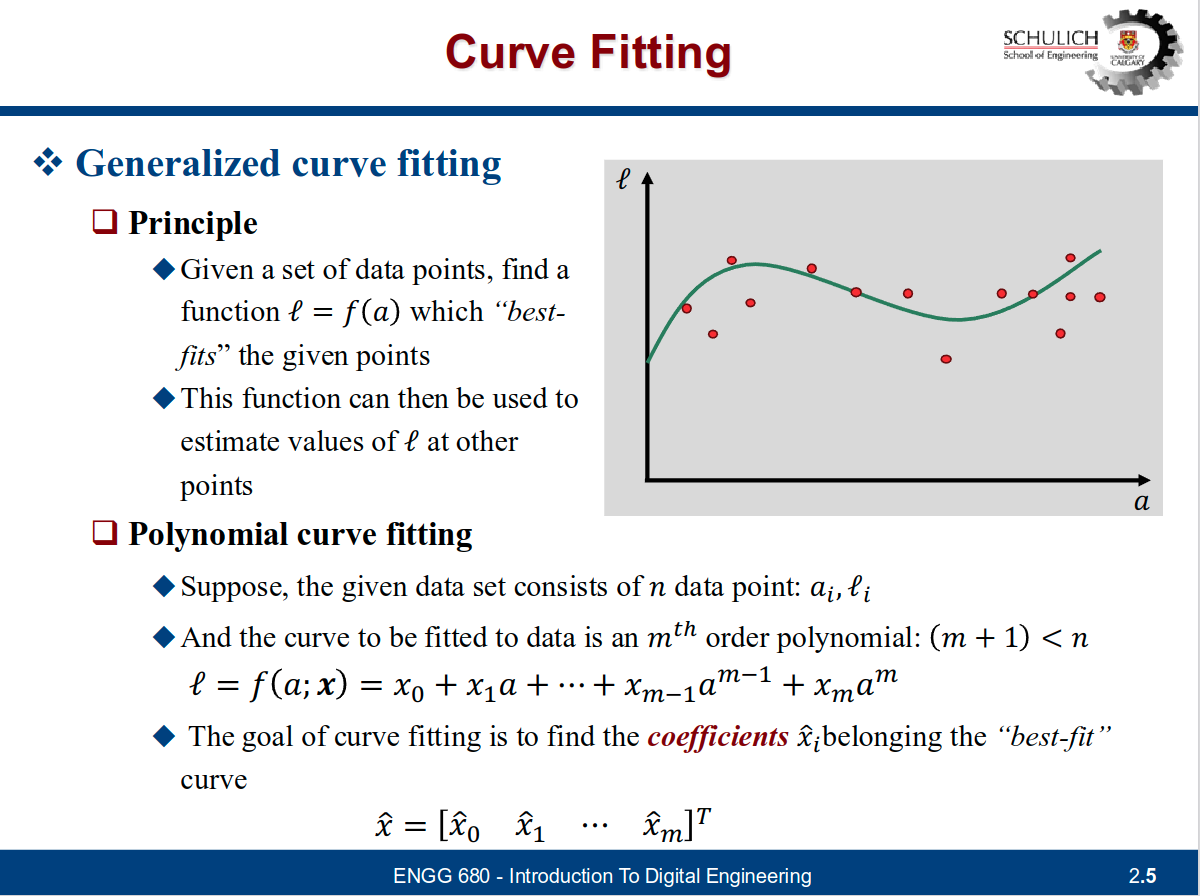

### **Observations:** values of a function f(a) in range of -Ãâ‚¬ to Ãâ‚¬, contaminated with random noise

### **Unknown States:** coefficients of polynomial functions for curve fitting

In [39]:
# step 1
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
# step 2
# Load data.xlsx file, which contains the observations (with noise), variance of observations and true observations
# hint: use pandas library to parse excel file and use numpy library to convert it to array
# (1 mark)
df_data = pd.read_excel ('/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment2/data.xlsx')
#print("DataFrame:\n", df_data)

arr_data = df_data.to_numpy()
#print("\nNumPy Array:\n", arr_data)


#store the noisy observations, variance of observations and true observations into numpy arrays seperately
# (1 mark)
l = arr_data[:,0]
l_var = arr_data[:,1]
l_true = arr_data[:,2]

In [53]:
# step 3
# define the number of observation n
# (1 mark)
n = len(l)
#print("Number of observations (n):", n)

# define the observation weight matrix P for LSE as identity matrix
# identity weight matrix simply means the observations will be unweighted in the following LSE
# (1 mark)
P = np.identity(n)
#print("Observation weight matrix (P):\n", P)

# define the range of function input(i.e., constants a), from start to end; and the numerical array of a
start = -1 * np.pi
end = np.pi
a = np.linspace(start, end, n)
#print(a)

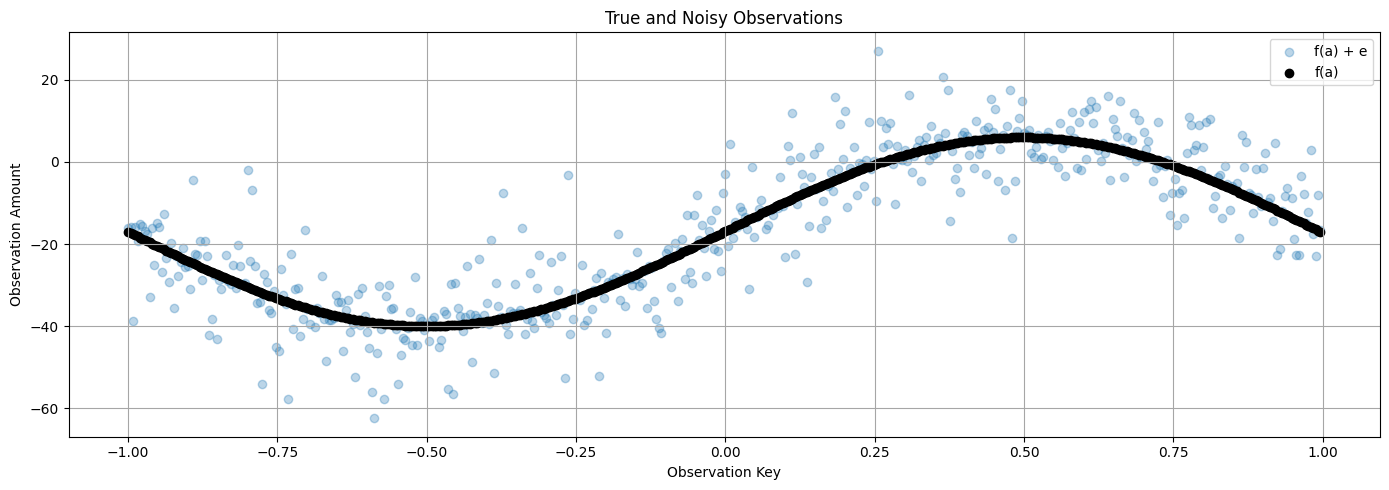

In [54]:
# step 4
# use the matplotlib to plot the true and noisy observations together in one single figure
# use scatter for noisy observation plotting
# for the true observation, label it as "f(a)"" and set color as 'k'
# for the noisy observation scatter plot, label it as "f(a) + e", set color as 'tab:blue', set marker as 'o' and set alpha as 0.3
# include proper axis labels, legend and title
# scale the range of x-axis to be -1 to 1
# keep this format for the rest of the plots in this lab assignment
# (2 marks)

#scale the range of x values

x_values=list(range(0,n))
for i in range(n):
  x=2*i/n-1
  x_values[i]=x


#plot the figure

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))

plt.scatter(x_values,l, label='f(a) + e', color='tab:blue', marker='o', alpha=0.3)
plt.scatter(x_values,l_true, label='f(a)', color='k')

plt.xlabel('Observation Key')
plt.ylabel('Observation Amount')
plt.title('True and Noisy Observations')
plt.legend(loc='upper right')

ax.grid(True, which='both',ls='-',color='0.65')
fig.tight_layout()


In [55]:
# step 5
# define a curve fitting function named fit_polynomial_curve
# the function should implement the linear least square estimation
# the function should include all important intermediate steps in LSE
# the input and output of the funciton are described in the comment below in red.
# please keep code clean and well-commented
# (9 marks)

def fit_polynomial_curve(a: np.ndarray, l: np.ndarray, P: np.ndarray, deg: int) -> tuple:
    '''
    Args:
        a:              function input (constants)
        l:              noisy observations
        P:              observation weight matrix
        deg:            degree of polynomial to fit to data
    Returns:
        x:              estimated polynomial coefficients
        cov_x:          uncertainty in estimated coefficients
        apv:            a posterier variance factor (goodness of fit)
        v:              observation residuals
    '''

      # create nx2 matrix A
    new_x = np.array(a)
    array_of_ones = np.ones(n)
    A = np.column_stack((array_of_ones, new_x))

    A_transpose = np.transpose(A)

    # create A^T*P*A matrix and its inverse
    result1 = np.matmul(A_transpose, P)
    result2 = np.matmul(result1, A)
    result3 = np.linalg.inv(result2)

    # create A^T*P*l matrix
    result4 = np.matmul(result1, l)

    # calculate x
    x = np.matmul(result3, result4)

    # vector of residuals, variance, covariance
    v = l - np.matmul(A, x)
    v_transpose = np.transpose(v)

    result5 = np.matmul(v_transpose, P)
    apv = 1/(n-(deg+1))*np.matmul(result5, v)

    cov_x = apv*result3

    return (x, cov_x, apv, v)

In [56]:
# step 6
# call the fit_polynomial_curve function and fetch the results
# use polynomial degrees of: 1, 3 ,5
# (1 marks)

deg1=fit_polynomial_curve(x_values,l,P,1)

deg3=fit_polynomial_curve(x_values,l,P,3)

deg5=fit_polynomial_curve(x_values,l,P,5)

In [57]:
# step 7
# use the estimated coefficients x and constants array a, construct polynomial functions for each degree
# hint: use polyval function from numpy library (check input argument carefully)
# (1 marks)

x_coeffs=list(deg1[0])

line_uw = np.polyval([x_coeffs[1],x_coeffs[0]], x_values)
cubic_uw = np.polyval([x_coeffs[1],0,0,x_coeffs[0]], x_values)
quintic_uw = np.polyval([x_coeffs[1],0,0,0,0,x_coeffs[0]], x_values)

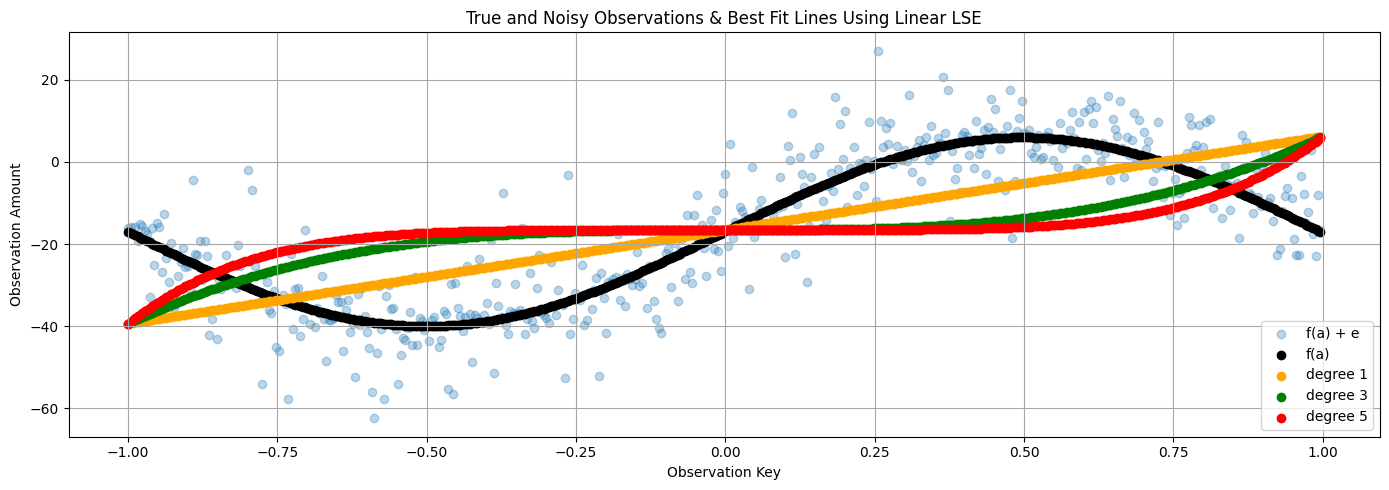

In [58]:
# step 8
# use the matplotlib to plot each polynomial function, noisy observations l, true observations l_true, together in one single figure
# for the polynomials of line, cubic and quintic, use color of orange, green and red respectively.
# (2 marks)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))

plt.scatter(x_values,l, label='f(a) + e', color='tab:blue', marker='o', alpha=0.3)
plt.scatter(x_values,l_true, label='f(a)', color='k')
plt.scatter(x_values,line_uw, label='degree 1', color='orange')
plt.scatter(x_values,cubic_uw, label='degree 3', color='green')
plt.scatter(x_values,quintic_uw, label='degree 5', color='red')

plt.xlabel('Observation Key')
plt.ylabel('Observation Amount')
plt.title('True and Noisy Observations & Best Fit Lines Using Linear LSE')
plt.legend(loc='lower right')

ax.grid(True, which='both',ls='-',color='0.65')

fig.tight_layout()

In [59]:
# step 9
# print the a posterier variance factor for each polynomial function
# (3 marks)

print(f'posterior valence degree 1: {deg1[2]}')
print(f'posterior valence degree 3: {deg3[2]}')
print(f'posterior valence degree 5: {deg5[2]}')

posterior valence degree 1: 162.742608604322
posterior valence degree 3: 163.39882880030717
posterior valence degree 5: 164.06036252014647


In [60]:
# step 10
# compute and print the norm between the predicted observations (output from each polynomial function) and the true observations
# (3 marks)

def norm(v,n):
  v=list(v)
  norm=0
  for i in range(n):
    v[i]=(v[i])**2
    norm=norm+v[i]
  return norm

norm1=norm(deg1[3],n)
print(f'norm for degree 1: {norm1}')

norm3=norm(deg3[3],n)
print(f'norm for degree 3: {norm3}')

norm5=norm(deg5[3],n)
print(f'norm for degree 5: {norm5}')

norm for degree 1: 81045.81908495234
norm for degree 3: 81045.81908495234
norm for degree 5: 81045.81908495234


In [61]:
# step 11
# comment on the results of a posterier variance factor and norm, what pattern do you observe
# (2 marks)

# The posterior variance factors are 162.74, 163.40, 164.06, for LSE will degree 1, degree 3, and degree 5, repectively.
# Variance is increasing, however marginally, which indicates that the accuracy is actually decreasing with an increasing
# order of magnitude.
# The norm for all three functions is identical at 81046.


In [62]:
# step 12
# now, let's define the P matrix with the proper weights of observation
# use the variance of observation l_var, define P matrix
# (1 mark)
P = np.identity(n)

l_var_new=l_var
for i in range(n):
  l_var_new[i]=1/l_var_new[i]

np.fill_diagonal(P, l_var_new, wrap=False)

degree 1 info:
(array([-16.49661917,  24.17120664]), array([[0.23919088, 0.00453612],
       [0.00453612, 0.78978485]]), 12.054651233436902, array([ 2.44729369e+01,  2.46349973e+01,  1.78386220e+00,  2.46094799e+01,
        2.09264177e+01,  2.50194227e+01,  2.45913160e+01,  2.30737830e+01,
        2.23708547e+01,  6.84358480e+00,  2.37003206e+01,  1.45600719e+01,
        2.46154698e+01,  2.36121505e+01,  1.25566958e+01,  2.65631033e+01,
        1.56130195e+01,  9.70832203e+00,  1.91069076e+01,  3.29535209e+00,
        1.57787872e+01,  1.08729343e+01,  1.42426688e+01,  1.74722352e+01,
        1.27190621e+01,  1.27832767e+01,  7.21716778e+00,  3.36036939e+01,
        1.54169279e+01,  1.52916364e+01,  1.84350292e+01,  8.94839650e+00,
        1.84293215e+01,  1.46546653e+01, -4.77692507e+00, -9.51652696e-01,
        9.54246246e+00, -6.09355597e+00,  8.21253024e+00,  6.00978810e+00,
        8.60207815e+00,  1.39971978e+01,  7.60770415e+00,  6.74802493e+00,
        1.11954230e+01,  5.5781536

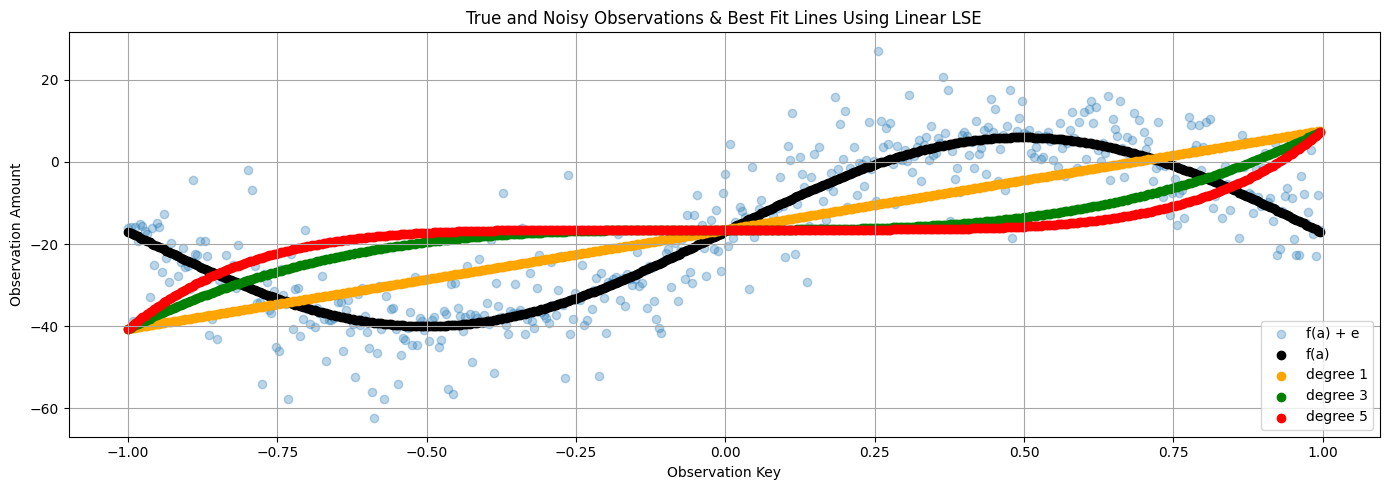

In [63]:
# step 13
# repeat the steps 6-10, using the proper P matrix
# (10 marks)

#step 6

deg1=fit_polynomial_curve(x_values,l,P,1)
print('degree 1 info:')
print(deg1)
print('')

deg3=fit_polynomial_curve(x_values,l,P,3)
print('degree 3 info:')
print(deg3)
print('')

deg5=fit_polynomial_curve(x_values,l,P,5)
print('degree 5 info:')
print(deg5)
print('')

#step 7

x_coeffs=list(deg1[0])

line_uw = np.polyval([x_coeffs[1],x_coeffs[0]], x_values)
cubic_uw = np.polyval([x_coeffs[1],0,0,x_coeffs[0]], x_values)
quintic_uw = np.polyval([x_coeffs[1],0,0,0,0,x_coeffs[0]], x_values)

#step 8

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))

plt.scatter(x_values,l, label='f(a) + e', color='tab:blue', marker='o', alpha=0.3)
plt.scatter(x_values,l_true, label='f(a)', color='k')
plt.scatter(x_values,line_uw, label='degree 1', color='orange')
plt.scatter(x_values,cubic_uw, label='degree 3', color='green')
plt.scatter(x_values,quintic_uw, label='degree 5', color='red')

plt.xlabel('Observation Key')
plt.ylabel('Observation Amount')
plt.title('True and Noisy Observations & Best Fit Lines Using Linear LSE')
plt.legend(loc='lower right')

ax.grid(True, which='both',ls='-',color='0.65')

fig.tight_layout()

#step 9

print(f'posterior valence degree 1: {deg1[2]}')
print(f'posterior valence degree 3: {deg3[2]}')
print(f'posterior valence degree 5: {deg5[2]}')
print('')

#step 10

norm1=norm(deg1[3],n)
print(f'norm for degree 1: {norm1}')

norm3=norm(deg3[3],n)
print(f'norm for degree 3: {norm3}')

norm5=norm(deg5[3],n)
print(f'norm for degree 5: {norm5}')
print('')

In [64]:
# step 14
# Compare the results of a posterier variance factor and norm from unweighted LSE and weighted LSE, what phenomena do you observe? Explain this phenomena.
# (2 marks)

# The posterior variance factors for unweighted LSE are 162.74, 163.40, 164.06. For weighted LSE, these facotrs are much
# lower at 12.06, 12.10, and 12.15. This indicates that properly weighing the P matrix can greatly increase the accuracy
# of a linear LSE model.

# The norm or total error is 81046 originally and 81341 with weighted LSE. The error has actually gotten worse because the
# outlying data points with high error margins were not prioritized in the model. Overall, in both cases the norm is still
# very large. This indicates that using LSE is not the correct curve fitting method for a set of data points that clearly
# do not have a linear relationship. Non-linear LSE will provide a better curve fitting function.

# **Non-linear LSE**
### (35 Marks)

### **SinglePointPositioning**

### **Observations:** Pseudorange [m]

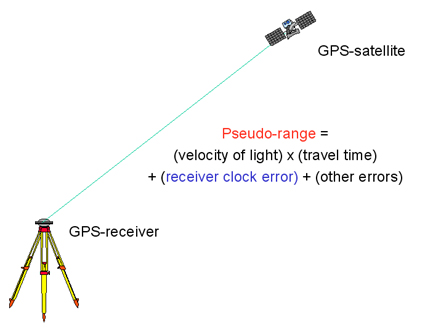

<font size="1.5">Image source: *ICA Course on Toponymy. https://unstats.un.org/unsd/geoinfo/ungegn/docs/_data_icacourses/_HtmlModules/_Selfstudy/S06/S06_05b.html.*</font>

**Pseudorange** is the *pseudo* distance between a satellite and a satellite signal receiver on the ground. In simple words, it contains the geometric range between the satellite and the receiver, with additional associated errors.

The simplified version of the Pseudorange measurement model is:
$$P=\rho-cdT+ÃÂµ_{sum}$$ and
$$\rho=\sqrt{(x_s - x_r)^2 + (y_s - y_r)^2 + (z_s - z_r)^2}$$
where
$$\rho=geometric\ range$$
$${x_s, y_s, z_s, x_r,y_r,z_r} = 3D\ coordinates\ of\ satellite\ and\ receiver$$
$$cdT = receiver\ clock\ offset$$
$$ÃÂµ_{sum}=general\ errors\ term\ (ÃÂµ_{sum}=\Delta \rho + \Delta_{\text{ion}} + \Delta_{\text{trop}} + \epsilon_P + cdt)$$

\\
Note: the 3D **positions of satellites** are given in this assignment.

### **Unknown States:** Position of receiver & receiver clock offset

We use the psuedorange measurements to estimate the receiver's **3-dimensional position** and the **receiver clock offset:** $$X={x_r,y_r,z_r,cdT}$$.

These will be our states of interest, and we are going to estimate them in the following Least Square Estimation.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [65]:
# step 1
# Load the psuedorange measurements and satellites' positions files, store them in the format of numpy array
# (hint: use pandas library to parse excel files into dataframe first, then convert them to numpy arrays)
# (1 marks)
df_pseudorange = pd.read_excel('/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment2/pseudoranges.xlsx')
df_sat_pos = pd.read_excel('/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment2/satellite_position.xlsx')

pseudorange = df_pseudorange.to_numpy()
sat_pos = df_sat_pos.to_numpy()

# separate column
sat_pos = df_sat_pos[['x', 'y', 'z']].to_numpy()
#print(sat_pos)

In [66]:
# step 2
# define the number of measurements n and the number of states m
# (2 mark)

# define the number of measurements n
n = pseudorange.shape[0]
print("Number of measurements n:", n)

# number of states m
m = sat_pos.shape[1]
print("Number of states m:", m)

Number of measurements n: 11
Number of states m: 3


In [67]:
# step 3
# Given that the variance of observation is 1 (m^2), define the weight matrix P
# (1 marks)

# Given that the variance of observation is 1 (m^2)
variance = 1.0

# define the weight matrix P
P = np.identity(n) * variance
print("Weight matrix (P):\n", P)

Weight matrix (P):
 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [68]:
# step 4
# set the initial states as zeros:
# (1 mark)
x_0 = np.zeros(m)
print("Initial states (x_0):\n", x_0)

Initial states (x_0):
 [0. 0. 0.]


In [69]:
# step 5
# GroundTruth coordiantes of the receiver
GroundTruth=np.array([-1633489.37967725,	-3651627.18250363,	4952481.61954918])

In [70]:
# step 6
# initialize the corrections array as ones, iteration loop counter i as zero and related arrays
# (2 mark)
delta = np.ones(m)
i = 0
arr_w = []
arr_delta=[]
arr_err_pos = []
arr_i = []
x_hat = x_0.copy()

In [71]:
# step 7
# define a function called euclidean_norm, which computes the geometric distances between satellites and receiver
# the input of the function should be two arrays: receiver_pos and satellite_pos
# the function should return an array of distance between satellites and receiver
# you can either use the numpy function or code the math manually
# (1 marks)
def euclidean_norm(receiver_pos, satellite_pos):
   distances = np.sqrt(np.sum((satellite_pos - receiver_pos) ** 2, axis=1))
   return distances


In [72]:
# step 8
# define a function named design_matrix which computes the design matrix A of this LSE problem
# the input of this funciton should be: estimated states array, satellites positions array and geometric distance array
# the function should return an two-dimensional array which represents the design matrix A
# (2 marks)
def design_matrix(r_pos, s_pos, rho):
  """
    Computes the design matrix A for the least squares estimation problem.

    Parameters:
    r_pos (numpy array): A 1D array of the estimated receiver's position [x, y, z].
    s_pos (numpy array): A 2D array of satellite positions, where each row is a satellite's position [x, y, z].
    rho (numpy array): A 1D array of geometric distances between satellites and receiver.

    Returns:
    A (numpy array): A 2D array representing the design matrix A.
    """
    # Number of satellites (rows in the design matrix)
  n = s_pos.shape[0]
    # Initialize the design matrix A with zeros (n rows, 3 columns for x, y, z coordinates)
  A = np.zeros((n, 3))
    # Compute each row of the design matrix
  for i in range(n):
        # Compute the partial derivatives of the geometric distance with respect to x, y, z
        A[i, 0] = (r_pos[0] - s_pos[i, 0]) / rho[i]  # Partial derivative with respect to x
        A[i, 1] = (r_pos[1] - s_pos[i, 1]) / rho[i]  # Partial derivative with respect to y
        A[i, 2] = (r_pos[2] - s_pos[i, 2]) / rho[i]  # Partial derivative with respect to z
  return A



In [73]:
# step 9
# start the iteration for the LSE (11 marks in total)

# define the convergence criteria for the 'while' loop
# the convergence criteria is that the corrections delta are less than 0.001 (i.e., <0.1 m), for receiver's position x,y,z part
# (1 marks)
threshold = 0.001
delta = np.ones(3)
i = 0
max_iterations = 100
while np.linalg.norm(delta) > threshold and i < max_iterations:

       # compute the geometri distance between Satellites and receiver, using the euclidean_norm function we just defined
       # (1 marks)
       rho_hat = euclidean_norm(x_hat, sat_pos)

       # compute the design matrix A
       # (1 marks)
       A = design_matrix(x_hat, sat_pos, rho_hat)

       # compute the misclosure array w
       # (1 marks)
       pseudorange_values = pseudorange[:, 1]
       w = pseudorange_values - rho_hat

       # compute the corrections delta
       # (1 marks)
       delta = np.linalg.inv(A.T @ A) @ (A.T @ w)

       # update the states
       # (1 marks)
       x_hat = x_hat + delta


       # compute the position error from using the updated states against groundtruth
       # (1 marks)
       err_pos = np.linalg.norm(x_hat - GroundTruth)


       # update the counter i, (i.e., increament of 1 for each iteration)
       # (1 mark)
       i += 1


       # store the misclosure, delta, position error and counter from each iteration into arrays, we will use them for plotting
       # (1 marks)
       arr_w.append(w)
       arr_delta.append(delta)
       arr_err_pos.append(err_pos)
       arr_i.append(i)




# After convergence, compute the A Posteriori Variance of Unit Weight
# (1 marks)
apv = (w.T @ w) / (n - m)

# compute the Covariance matrix of estimated states
# (1 marks)
C_x_hat = apv * np.linalg.inv(A.T @ A)




In [74]:
# step 10
"""
Print:
      {estimated states,
       corrections array,
       estimated measurements residuals,
       A posteriori Variance of Unit Weight,
       Covariance matrix of estimated states,
       number of iterations,
       3-D position errors},

after the LSE convergence to the console.
"""
# (7 marks)

print("Estimated States (x_hat):\n", x_hat)
print("\nCorrections Array (delta):\n", delta)
print("\nEstimated Measurements Residuals (w):\n", w)
print("\nA Posteriori Variance of Unit Weight (apv):\n", apv)
print("\nCovariance Matrix of Estimated States (C_x_hat):\n", C_x_hat)
print("\nNumber of Iterations (i):", i)
print("\n3-D Position Errors (err_pos):\n", err_pos)

Estimated States (x_hat):
 [-1633491.76822453 -3651626.13394256  4952475.21438698]

Corrections Array (delta):
 [-5.52938292e-08 -2.23387232e-07  5.32531551e-07]

Estimated Measurements Residuals (w):
 [ 3.82175379e+00 -1.66028602e+00  4.29356746e-01  1.56435724e-01
  3.61111910e+00  1.24503499e+00 -2.51530856e-03  2.20369535e+00
  8.90098773e-02  3.48029512e+00 -4.11836287e+00]

A Posteriori Variance of Unit Weight (apv):
 8.26237918592798

Covariance Matrix of Estimated States (C_x_hat):
 [[2.57798542 0.25763197 0.25441942]
 [0.25763197 1.91297367 0.00291461]
 [0.25441942 0.00291461 2.49954465]]

Number of Iterations (i): 5

3-D Position Errors (err_pos):
 6.915977242568731


In [ ]:
# step 11
# Comment on the computed A Posteriori Variance of Unit Weight value and the Covariance matrix of estimated states
# (2 marks)
# APV value is notably greater than 1, model might not fit the observations perfectly
# It indicates some errors or noise in the pseudorange measurements
# Also using only a linear approximation may not fully capture all the dynamics of the problem.

# Covariance Matrix indicates that the uncertainties in the x,y,z directions are somewhat balanced, with the y-directions are somewhat balanced
# The off-diagonal elements are small, which indicates minimal correlation between the uncertainties in different directions.


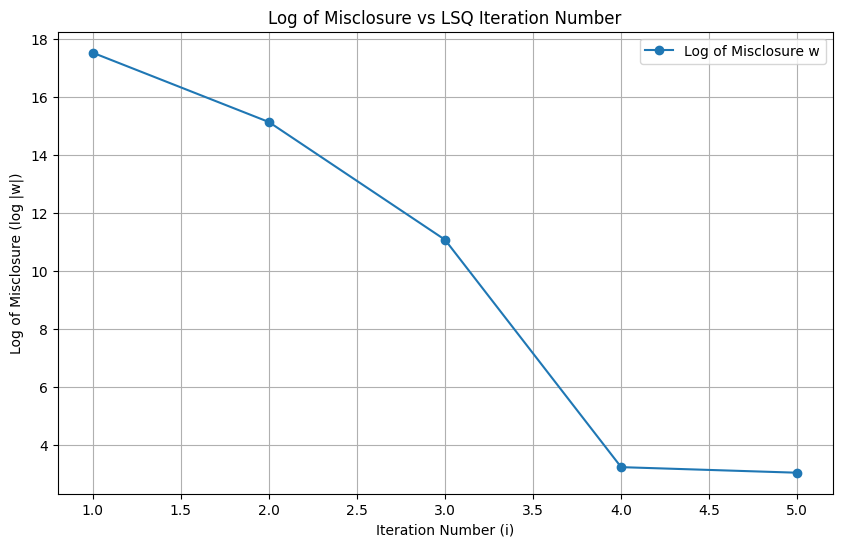

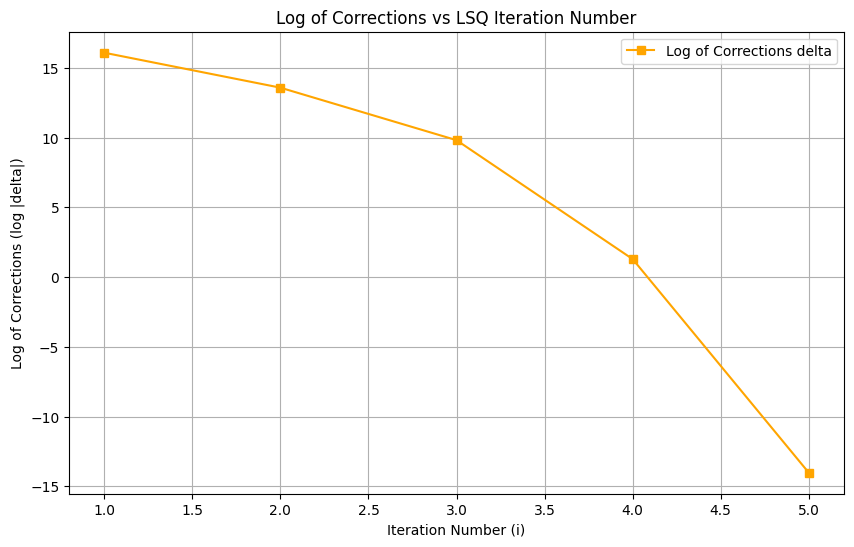

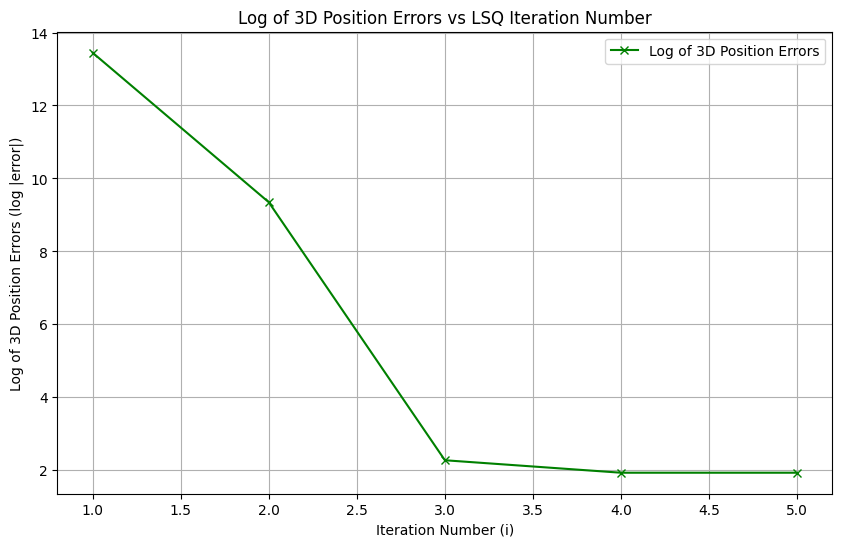

In [18]:
# step 12
# Using the imported matplotlib, plot the following (3 marks in total). Make sure to include proper axes information, legend, grid lines and title.

# 1. Plot log of the misclosure w against the LSQ iteration number i
# (1 marks)

plt.figure(figsize=(10, 6))
plt.plot(arr_i, np.log(np.abs(arr_w).sum(axis=1)), label="Log of Misclosure w", marker='o')
plt.xlabel('Iteration Number (i)')
plt.ylabel('Log of Misclosure (log |w|)')
plt.title('Log of Misclosure vs LSQ Iteration Number')
plt.legend()
plt.grid(True)
plt.show()

# 2. Plot log of the corrections delta against the LSQ iteration number i
# (1 marks)

plt.figure(figsize=(10, 6))
plt.plot(arr_i, np.log(np.abs(arr_delta).sum(axis=1)), label="Log of Corrections delta", color='orange', marker='s')
plt.xlabel('Iteration Number (i)')
plt.ylabel('Log of Corrections (log |delta|)')
plt.title('Log of Corrections vs LSQ Iteration Number')
plt.legend()
plt.grid(True)
plt.show()

# 3. Plot log of the 3D position errors against the LSQ iteration number i
# (1 marks)

plt.figure(figsize=(10, 6))
plt.plot(arr_i, np.log(arr_err_pos), label="Log of 3D Position Errors", color='green', marker='x')
plt.xlabel('Iteration Number (i)')
plt.ylabel('Log of 3D Position Errors (log |error|)')
plt.title('Log of 3D Position Errors vs LSQ Iteration Number')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# step 13
# Describe the phenomena or pattern you recognize for each plot, and explain such phenomena
# (2 marks)
# The three plots show a consistent pattern of rapid improvement in the early iterations, followed by diminishing changes as the algorithm converges.
# The log of the misclosure and corrections decreases steadily, indicating that the receiver's position is being refined with each iteration
#  The 3D position error also decreases, confirming the algorithm's success in approaching the true position.
# Overall, the steady decline across all metrics shows that the LSE process is working effectively to reduce errors and converge to an accurate solution.


In [ ]:
# this is just for fun (no marks allocated)
# now you can estimated the receiver's position in Earth-center-earth-fixed (ECEF)
# you can use this tool: https://www.oc.nps.edu/oc2902w/coord/llhxyz.htm to convert it to latitude, longitude and height
# and find where is it on google earth!
